In [8]:
08/25/2020


[1] 0.0001584158

In [37]:
library(tidyverse)
library(reshape2)
library(pheatmap)

In [7]:
lib_csv = '../../psych_lib_info.csv'
lib_df = read.csv(lib_csv)
lib_df = mutate(lib_df, name_abbr = str_c(Chr, Position, sep='_'))
head(lib_df)

,X.1,name,X,Linked_SNP,Chr,Position,Index_SNP,Disease,DHS_tissue,eGene,⋯,dbscSNV.ada_score,dbscSNV.rf_score,RawScore,PHRED,num_disease,disease_interest,pass_thres_low,pass_thres,CADD_score_bool,name_abbr
,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,1,chr1.111243375.all_alt.G,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
2,2,chr1.111243375.Ref.C,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
3,3,chr1.113938499.all_alt.C,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
4,4,chr1.113938499.Ref.T,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
5,5,chr1.11712109.all_alt.T,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109
6,6,chr1.11712109.Ref.C,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109


In [78]:
D0 = read.csv('mpraanalyze_H9D0_comp_filt.csv')

D2 = read.csv('mpraanalyze_H9D2_comp_filt.csv')

D4 = read.csv('mpraanalyze_H9D4_comp_filt.csv')

D10 =read.csv( 'mpraanalyze_H9D10_comp_filt.csv')

SL = read.csv( 'mpraanalyze_SL_comp_filt.csv')
SLC = read.csv( 'mpraanalyze_SLC_comp_filt.csv')

AST1 = read.csv( 'mpraanalyze_AST1_comp_filt.csv')


In [80]:
D0$Disease

[1] atopic dermatitis,schizophrenia                                    
 [2] atopic dermatitis,schizophrenia                                    
 [3] parkinson,schizophrenia                                            
 [4] parkinson,schizophrenia                                            
 [5] schizo                                                             
 [6] schizo                                                             
 [7] schizo                                                             
 [8] schizo                                                             
 [9] schizo                                                             
[10] schizophrenia                                                      
[11] schizophrenia                                                      
[12] depression                                                         
[13] depression                                                         
[14] attention deficit hyperactivity disorder,schizophrenia,hypertension
[15] attention deficit hyperactivity disorder,schizophrenia,hypertension
[16] anxiety                                                            
[17] anxiety                                                            
[18] anxiety                                                            
[19] anxiety                                                            
[20] schizo                                                             
[21] schizo                                                             
[22] Panic Disorder                                                     
[23] Panic Disorder                                                     
[24] schizophrenia                                                      
[25] schizophrenia                                                      
[26] borderline personality disorder                                    
[27] borderline personality disorder                                    
[28] schizophrenia,brca,lung                                            
[29] schizophrenia,brca,lung                                            
[30] bipolar                                                            
[31] bipolar                                                            
[32] anxiety                                                            
[33] anxiety                                                            
[34] autism                                                             
[35] autism                                                             
[36] bipolar                                                            
[37] bipolar                                                            
[38] vitiligo,schizophrenia                                             
[39] vitiligo,schizophrenia                                             
[40] schizophrenia                                                      
[41] schizophrenia                                                      
[42] asthma,depression                                                  
[43] asthma,depression                                                  
[44] schizophrenia,bipolar,schizophrenia                                
[45] schizophrenia,bipolar,schizophrenia                                
[46] anxiety                                                            
[47] anxiety                                                            
15 Levels: anxiety asthma,depression ... vitiligo,schizophrenia

In [76]:
length(unique(D0$rowname))
length(unique(D2$rowname))
length(unique(D4$rowname))
length(unique(D10$rowname))
length(unique(SL$rowname))
length(unique(SLC$rowname))
length(unique(AST1$rowname))


[1] 88

[1] 76

[1] 73

[1] 104

[1] 42

[1] 113

[1] 78

In [77]:
length(unique(D0$rowname, D2$rowname, D4$rowname,D10$rowname, AST1$rowname, SL$rowname, SLC$rowname))

[1] 165

In [9]:
D0 = read.csv('mpraanalyze_H9D0_comp.csv')
D0 = D0 %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))
D2 = read.csv('mpraanalyze_H9D2_comp.csv')
D2 = D2 %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))
D4 = read.csv('mpraanalyze_H9D4_comp.csv')
D4 = D4 %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))
D10 =read.csv( 'mpraanalyze_H9D10_comp.csv')
D10 = D10 %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))

Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”
Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”
Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”
Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”


In [11]:
colnames(D10)

[1] "X.x"                "rowname"            "statistic"         
  [4] "pval"               "fdr"                "df.test"           
  [7] "df.dna"             "df.rna.full"        "df.rna.red"        
 [10] "logFC"              "neglog10_p"         "neglog10_p_x_logFC"
 [13] "X.1"                "name"               "X.y"               
 [16] "Linked_SNP"         "Chr"                "Position"          
 [19] "Index_SNP"          "Disease"            "DHS_tissue"        
 [22] "eGene"              "eQTL_tissue"        "Pval"              
 [25] "source"             "RS"                 "pos"               
 [28] "info"               "allele_type"        "allele"            
 [31] "seq150_new"         "seq21_new"          "schizo"            
 [34] "depress"            "bipolar"            "anxiety"           
 [37] "attent"             "personality"        "panic"             
 [40] "traum"              "autism"             "ocd"               
 [43] "Ref"                "Alt"                "Type"              
 [46] "Length"             "AnnoType"           "Consequence"       
 [49] "ConsScore"          "ConsDetail"         "GC"                
 [52] "CpG"                "motifECount"        "motifEName"        
 [55] "motifEHIPos"        "motifEScoreChng"    "oAA"               
 [58] "nAA"                "GeneID"             "FeatureID"         
 [61] "GeneName"           "CCDS"               "Intron"            
 [64] "Exon"               "cDNApos"            "relcDNApos"        
 [67] "CDSpos"             "relCDSpos"          "protPos"           
 [70] "relProtPos"         "Domain"             "Dst2Splice"        
 [73] "Dst2SplType"        "minDistTSS"         "minDistTSE"        
 [76] "SIFTcat"            "SIFTval"            "PolyPhenCat"       
 [79] "PolyPhenVal"        "priPhCons"          "mamPhCons"         
 [82] "verPhCons"          "priPhyloP"          "mamPhyloP"         
 [85] "verPhyloP"          "bStatistic"         "targetScan"        
 [88] "mirSVR.Score"       "mirSVR.E"           "mirSVR.Aln"        
 [91] "cHmmTssA"           "cHmmTssAFlnk"       "cHmmTxFlnk"        
 [94] "cHmmTx"             "cHmmTxWk"           "cHmmEnhG"          
 [97] "cHmmEnh"            "cHmmZnfRpts"        "cHmmHet"           
[100] "cHmmTssBiv"         "cHmmBivFlnk"        "cHmmEnhBiv"        
[103] "cHmmReprPC"         "cHmmReprPCWk"       "cHmmQuies"         
[106] "GerpRS"             "GerpRSpval"         "GerpN"             
[109] "GerpS"              "TFBS"               "TFBSPeaks"         
[112] "TFBSPeaksMax"       "tOverlapMotifs"     "motifDist"         
[115] "Segway"             "EncH3K27Ac"         "EncH3K4Me1"        
[118] "EncH3K4Me3"         "EncExp"             "EncNucleo"         
[121] "EncOCC"             "EncOCCombPVal"      "EncOCDNasePVal"    
[124] "EncOCFairePVal"     "EncOCpolIIPVal"     "EncOCctcfPVal"     
[127] "EncOCmycPVal"       "EncOCDNaseSig"      "EncOCFaireSig"     
[130] "EncOCpolIISig"      "EncOCctcfSig"       "EncOCmycSig"       
[133] "Grantham"           "Dist2Mutation"      "Freq100bp"         
[136] "Rare100bp"          "Sngl100bp"          "Freq1000bp"        
[139] "Rare1000bp"         "Sngl1000bp"         "Freq10000bp"       
[142] "Rare10000bp"        "Sngl10000bp"        "dbscSNV.ada_score" 
[145] "dbscSNV.rf_score"   "RawScore"           "PHRED"             
[148] "num_disease"        "disease_interest"   "pass_thres_low"    
[151] "pass_thres"         "CADD_score_bool"

In [13]:
D0 = D0 %>%select(rowname, statistic, pval, fdr, logFC, Linked_SNP, Chr, Position, Index_SNP, Disease, eGene, eQTL_tissue, Pval, GeneName)
D0$day = 'D0'
D2 = D2 %>%select(rowname, statistic, pval, fdr, logFC, Linked_SNP, Chr, Position, Index_SNP, Disease, eGene, eQTL_tissue, Pval, GeneName)
D2$day = 'D2'
D4 = D4 %>%select(rowname, statistic, pval, fdr, logFC, Linked_SNP, Chr, Position, Index_SNP, Disease, eGene, eQTL_tissue, Pval, GeneName)
D4$day = 'D4'
D10 = D10 %>%select(rowname, statistic, pval, fdr, logFC, Linked_SNP, Chr, Position, Index_SNP, Disease, eGene, eQTL_tissue, Pval, GeneName)
D10$day = 'D10'


In [15]:
time_df = rbind(D0,D2,D4,D10)

In [25]:
tf_atac_time = read.csv('/Users/mguo123/Documents/pan_omics_psych/data/processed/fig1/atac/atac_time_heatmap_tfs.csv',row.names=1)
diff_tfs = rownames(tf_atac_time)

In [27]:
time_df_tf = time_df[time_df$GeneName %in%diff_tfs,]
dim(time_df_tf)

[1] 74 15

In [32]:
mpra_tfs = as.character(unique(time_df_tf$GeneName))
mpra_tfs

[1] "ZFHX3" "RARB"  "NFKB1" "FOXP1" "SOX7"  "GLIS3"

In [57]:
time_df_tf_sel =time_df_tf%>%
    select( GeneName, day, logFC)%>%
    group_by(GeneName,day)%>%
    summarise(logFC=mean(logFC))%>%
    spread(  day,    value=logFC)%>%
    column_to_rownames('GeneName')

,D0,D10,D2,D4
,<dbl>,<dbl>,<dbl>,<dbl>
FOXP1,0.1439465,0.2369790,-0.01255710,0.23017695
GLIS3,-0.2700004,-0.3738896,-0.03263584,-0.09029058
NFKB1,-0.1359966,-0.2002008,-0.08979206,-0.04135434
RARB,1.0414257,0.9549639,0.73586598,0.65388166
SOX7,-0.3337257,-1.7684998,-1.17825388,-1.02643931
ZFHX3,0.8241419,0.6175005,0.96652588,0.78231081


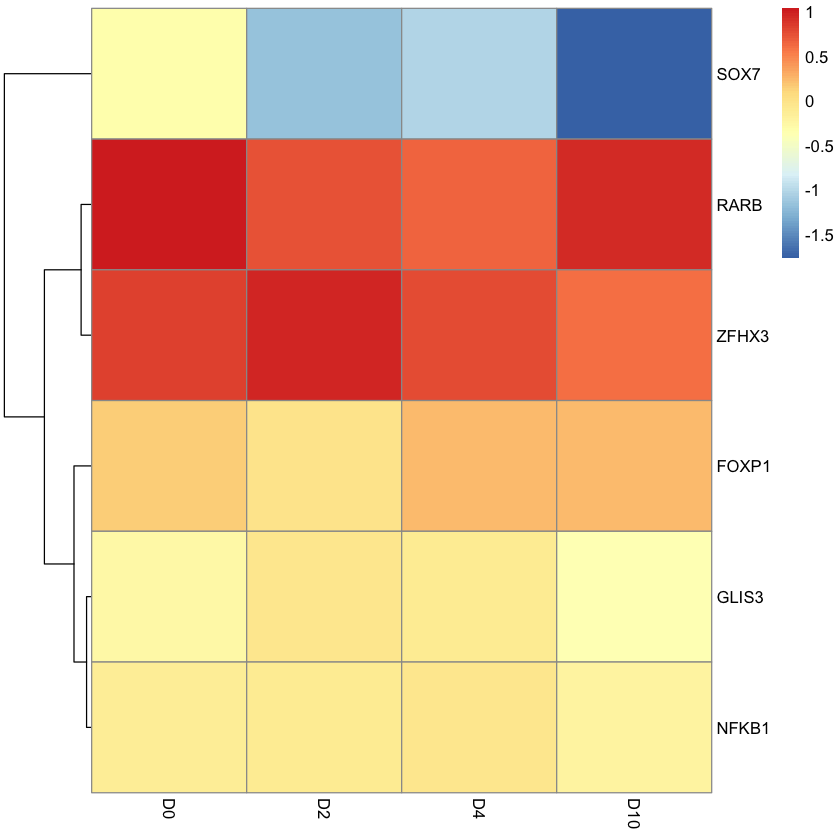

In [64]:
time_df_tf_sel
pheatmap(time_df_tf_sel[,c("D0","D2","D4","D10")], cluster_rows=T,cluster_cols=F)

In [59]:
time_df_tf_sel_p =time_df_tf%>%
    select( GeneName, day, pval)%>%
    group_by(GeneName,day)%>%
    summarise(pval=mean(pval))%>%
    spread(  day,    value=pval)%>%
    column_to_rownames('GeneName')

time_df_tf_sel_p

,D0,D10,D2,D4
,<dbl>,<dbl>,<dbl>,<dbl>
FOXP1,0.717950727,0.532870140,0.97162579,0.540961782
GLIS3,0.406376372,0.245061783,0.92036970,0.779670164
NFKB1,0.541435617,0.297443490,0.40727749,0.408552566
RARB,0.019748789,0.013938205,0.07372053,0.117054237
SOX7,0.508404572,0.003717403,0.01823848,0.046058205
ZFHX3,0.001608122,0.051072169,0.03096138,0.006875361


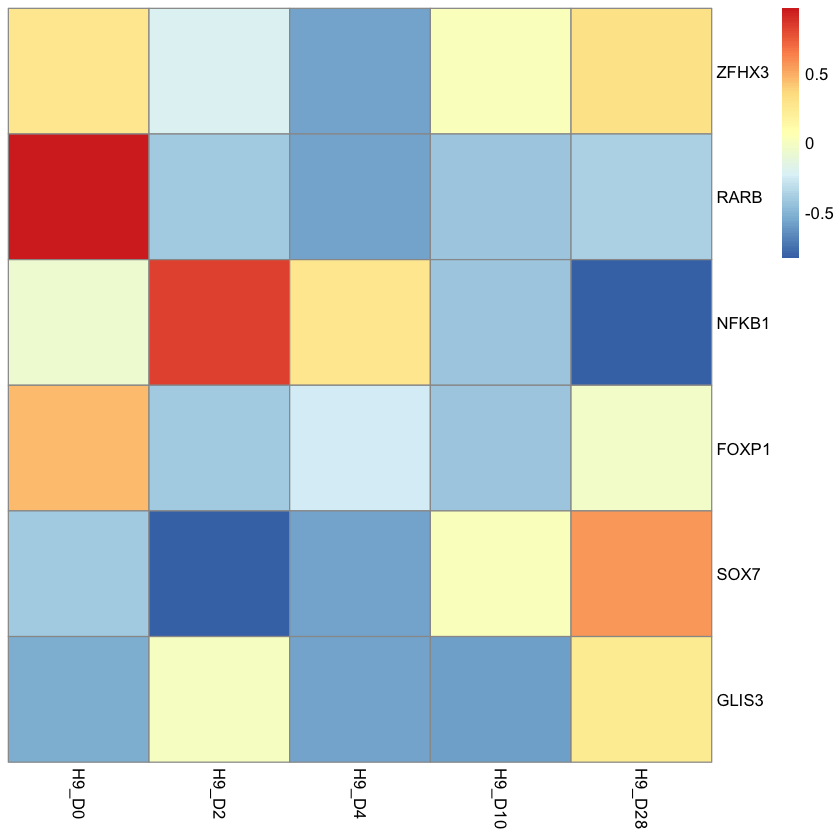

In [54]:
pheatmap(tf_atac_time[mpra_tfs,],cluster_rows=F,cluster_cols=F)

In [55]:
pheatmap(time_df_tf_sel_p,cluster_rows=F,cluster_cols=F)

Warning message in seq.default(min(x, na.rm = T), max(x, na.rm = T), length.out = n + :
“NAs introduced by coercion”


ERROR: Error in seq.default(min(x, na.rm = T), max(x, na.rm = T), length.out = n + : 'to' must be a finite number
